In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
file_list=os.listdir('./DMdata')

In [3]:
file_list

['DM01',
 'DM02',
 'DM03',
 'DM04',
 'DM05',
 'DM06',
 'DM07',
 'DM08',
 'DM09',
 'DM10',
 'DM11',
 'DM12',
 'DM13',
 'DM14',
 'DM15',
 'DM16',
 'DM17',
 'DM18',
 'DM19',
 'DM20',
 'DM21',
 'DM22',
 'DM23',
 'DM24',
 'DM25',
 'DM26',
 'DM27',
 'DM28',
 'DM29',
 'DM30',
 'DM31']

## 8

In [4]:
#분류하고 column추가
def sort(test_df):    
    test_df['sorting']=""
    conditionlist = [
        (test_df['Task_Type'] == 0)& (test_df['Res1'] == 1),
        (test_df['Task_Type'] == 0)& (test_df['Res1'] == 2),
        (test_df['Task_Type'] == 0)& (test_df['Res1'] == 3),
        (test_df['Task_Type'] == 0)& (test_df['Res1'] == 4),
        (test_df['Task_Type'] == 1)& (test_df['Res1'] == 1),
        (test_df['Task_Type'] == 1)& (test_df['Res1'] == 2),
        (test_df['Task_Type'] == 1)& (test_df['Res1'] == 3),
        (test_df['Task_Type'] == 1)& (test_df['Res1'] == 4)]
    choicelist = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
    test_df['sorting']=np.select(conditionlist,choicelist, default='Not Specified')
  
    return test_df
    

## 7


In [5]:
def calc_probability(data):
    data=sort(data)
    old_type=data[data['Task_Type']==0]
    new_type=data[data['Task_Type']==1]
    old_type_prob = (old_type.groupby(['sorting'])['Trial'].count())/len(old_type)
    new_type_prob = (new_type.groupby(['sorting'])['Trial'].count())/len(new_type)
    type_prob=pd.concat([old_type_prob,new_type_prob])
        
    Series_prob = pd.Series(type_prob, index=['HIT-HC', 'HIT-LC','MISS-LC','MISS-HC','FA-HC','FA-LC','CR-LC','CR-HC'])
       
    return Series_prob

In [6]:
for i in file_list:
    data = pd.read_csv('./DMdata/{}/{}_test.txt'.format(i,i), sep='\t', index_col= False)
    proportion=calc_probability(data)
    ser_prop=pd.Series(proportion)
    print(ser_prop)

HIT-HC     0.670455
HIT-LC     0.140152
MISS-LC    0.106061
MISS-HC    0.083333
FA-HC      0.030303
FA-LC      0.094697
CR-LC      0.344697
CR-HC      0.530303
Name: Trial, dtype: float64
HIT-HC     0.431818
HIT-LC     0.291667
MISS-LC    0.143939
MISS-HC    0.132576
FA-HC      0.071970
FA-LC      0.287879
CR-LC      0.314394
CR-HC      0.325758
Name: Trial, dtype: float64
HIT-HC     0.609848
HIT-LC     0.140152
MISS-LC    0.140152
MISS-HC    0.109848
FA-HC      0.022727
FA-LC      0.079545
CR-LC      0.306818
CR-HC      0.590909
Name: Trial, dtype: float64
HIT-HC     0.696970
HIT-LC     0.007576
MISS-LC    0.018939
MISS-HC    0.276515
FA-HC      0.132576
FA-LC      0.015152
CR-LC      0.037879
CR-HC      0.814394
Name: Trial, dtype: float64
HIT-HC     0.469697
HIT-LC     0.215909
MISS-LC    0.068182
MISS-HC    0.246212
FA-HC      0.056818
FA-LC      0.189394
CR-LC      0.106061
CR-HC      0.647727
Name: Trial, dtype: float64
HIT-HC     0.416667
HIT-LC     0.159091
MISS-LC    0.075758


## 9

In [7]:
df1 = pd.DataFrame()
filelist=os.listdir('./DMdata')
for i in filelist:
    data = pd.read_csv('./DMdata/{}/{}_test.txt'.format(i,i), sep='\t', index_col= False)
    proportion=calc_probability(data)
    df1['{}_test'.format(i)]=proportion

df2=df1.transpose().fillna(0)
display(df2)

,HIT-HC,HIT-LC,MISS-LC,MISS-HC,FA-HC,FA-LC,CR-LC,CR-HC
DM01_test,0.670455,0.140152,0.106061,0.083333,0.030303,0.094697,0.344697,0.530303
DM02_test,0.431818,0.291667,0.143939,0.132576,0.071970,0.287879,0.314394,0.325758
DM03_test,0.609848,0.140152,0.140152,0.109848,0.022727,0.079545,0.306818,0.590909
DM04_test,0.696970,0.007576,0.018939,0.276515,0.132576,0.015152,0.037879,0.814394
DM05_test,0.469697,0.215909,0.068182,0.246212,0.056818,0.189394,0.106061,0.647727
DM06_test,0.416667,0.159091,0.075758,0.348485,0.064394,0.090909,0.090909,0.753788
DM07_test,0.299242,0.280303,0.181818,0.238636,0.034091,0.155303,0.321970,0.488636
DM08_test,0.405303,0.261364,0.242424,0.090909,0.018939,0.102273,0.594697,0.284091
DM09_test,0.265152,0.371212,0.359848,0.003788,0.000000,0.215909,0.772727,0.011364
DM10_test,0.693182,0.071970,0.102273,0.132576,0.018939,0.056818,0.250000,0.674242


In [9]:
values=[]
types=[]
category=[]
old_class=['HIT-HC','HIT-LC','MISS-LC','MISS-HC']

for i in df2.columns:
    values += list(df2[i])
    types += list([i]*len(df2))
    if (i in old_class):
        category+=list(['old']*len(df2))
    else:
        category += list(['new']*len(df2))

In [10]:
plot_df = pd.DataFrame({'value':values, 'type':types, 'old&new':category})
plot_df

,value,type,old&new
0,0.670455,HIT-HC,old
1,0.431818,HIT-HC,old
2,0.609848,HIT-HC,old
3,0.696970,HIT-HC,old
4,0.469697,HIT-HC,old
...,...,...,...
243,0.026515,CR-HC,new
244,0.125000,CR-HC,new
245,0.166667,CR-HC,new
246,0.053030,CR-HC,new


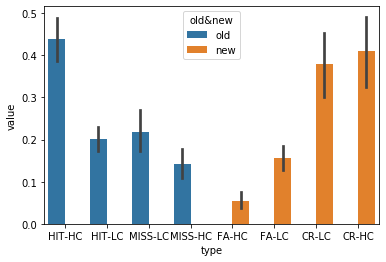

In [11]:
import seaborn as sns
sns.barplot(data=plot_df, x='type' , y='value' , hue='old&new' )

## 10 & 11

In [12]:
def scoring(df):
    df['score']=""
    conditionlist=[
        (df['LocID']==df['Res2']),(df['LocID']!=df['Res2'])]
    choicelist=['correct','wrong']
    df['score']=np.select(conditionlist,choicelist)
    return df

In [13]:
def possibility(df):
    cor_possibility=df.groupby(['score','sorting'])['score'].count()/df.groupby('sorting')['score'].count()
    return cor_possibility

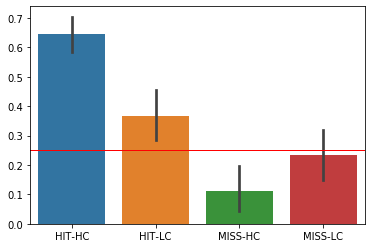

In [14]:
study_all={}
test_all={}
all_data={}
df={}
final_df={}
last_df=pd.DataFrame({})
df_possibility = pd.DataFrame(index=range(0,4), )
for i in range(len(file_list)):
    study = pd.read_csv('./DMdata/{}/{}_study.txt'.format(file_list[i], file_list[i]), sep='\t', index_col= False)
    data = pd.read_csv('./DMdata/{}/{}_test.txt'.format(file_list[i], file_list[i]),sep='\t', index_col= False)
    #study.file정리
    study.rename({'ObjID':'Object_ID'},axis='columns',inplace=True)
    study=study.sort_values('Object_ID')
    study=study[['Object_ID','LocID']]
    study_all[i]=study
    #old.file정리
    old = (data['Task_Type'] == 0)
    old_df=data[old]
    old_df = old_df.sort_values('Object_ID')
    old_df=sort(old_df)
    old_df = old_df[['Object_ID','Res2','sorting']]
    test_all[i]=old_df
    
    all_data[i]=pd.merge(study_all[i],test_all[i],on='Object_ID')
    all_data[i]=all_data[i][all_data[i]['Res2'] != 5]
    
    all_data[i]=scoring(all_data[i])
    df[i]=possibility(all_data[i])['correct']
    
    final_df[i] = df[i]
    
    #plot그리기
    #sns.barplot(data=df2)
final_df = pd.DataFrame(final_df).fillna(0).transpose()

import matplotlib.pyplot as plt
sns.barplot(data=final_df)
plt.axhline(y=0.25, color='r', linewidth=1)